In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
df = pd.read_csv('https://raw.githubusercontent.com/tisheedesh/Project/main/Data/data_processed.csv').drop(['Unnamed: 0'], axis=1)

In [395]:
df.columns

Index(['Артикул', 'Для кого', 'Примерный вес', 'Тип металла', 'Проба',
       'Покрытие', 'Тип вставки', 'Форма вставки', 'Количество', 'Цвет', 'Вес',
       'Тип вставки 2', 'Форма вставки 2', 'Количество 2', 'Цвет 2', 'Вес 2',
       'Ширина кольца', 'Ширина', 'Высота', 'Номер страницы',
       'Цена со скидкой', 'Цена без скидки'],
      dtype='object')

In [396]:
df.describe()

,Примерный вес,Проба,Количество,Вес,Количество 2,Вес 2,Ширина кольца,Ширина,Высота,Номер страницы,Цена со скидкой,Цена без скидки
count,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8.492000e+03,8.492000e+03
mean,2.269896,669.340556,7.772374,0.690260,4.677343,0.154182,2.249812,7.606000,3.755768,73.304522,4.208324e+04,9.857831e+04
std,1.229823,158.022857,18.015935,1.281404,10.621306,0.564410,1.227961,3.367311,1.372621,41.798467,8.773680e+04,1.978102e+05
min,0.170000,375.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.400000e+02,9.900000e+02
25%,1.490000,585.000000,1.000000,0.065000,0.000000,0.000000,2.000000,6.000000,3.755826,38.000000,5.850000e+03,1.299000e+04
50%,1.980000,585.000000,1.000000,0.267000,0.000000,0.000000,2.000000,7.605504,3.755826,73.000000,2.160000e+04,5.299000e+04
75%,2.680000,925.000000,6.000000,0.752000,4.000000,0.102000,2.249783,7.605504,4.000000,110.000000,4.200000e+04,9.999000e+04
max,14.600000,1000.000000,253.000000,18.705000,143.000000,11.099000,20.000000,110.000000,32.000000,146.000000,2.747250e+06,6.104990e+06


In [397]:
df.loc[df['Ширина'] == df['Ширина'].max(), 'Артикул']

1065    2011268
Name: Артикул, dtype: object

<Axes: >

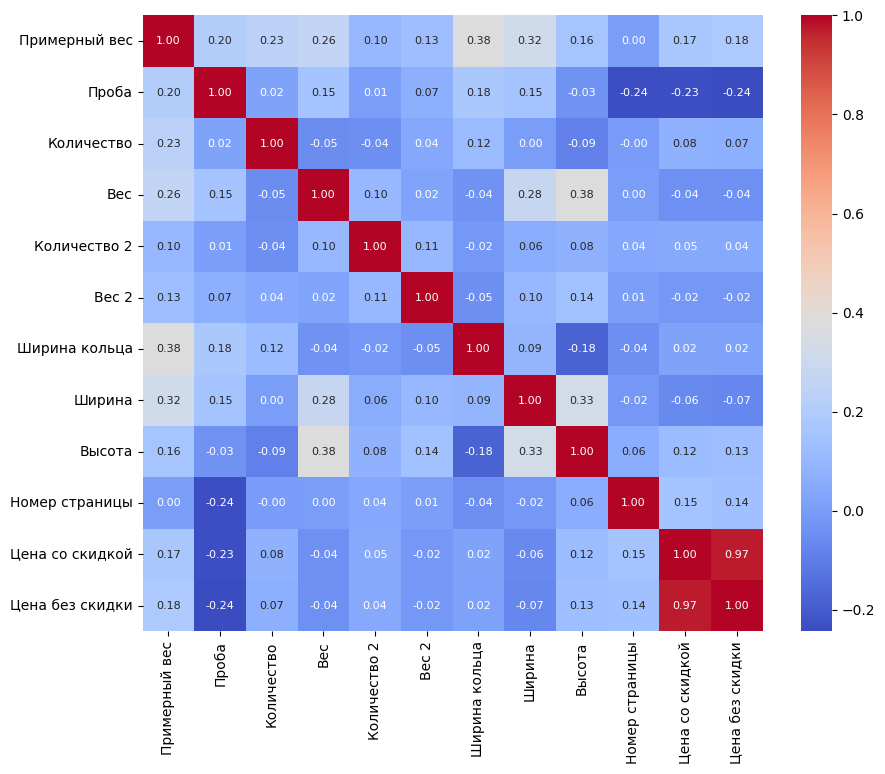

In [398]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt="0.2f", annot_kws={"size":8})

In [399]:
# 'Для кого', 'Тип металла', 'Покрытие', 'Тип вставки', 'Форма вставки', 'Цвет', 'Тип вставки 2', 'Форма вставки 2', 'Цвет 2'

In [400]:
df = df.drop(df.loc[df['Тип вставки 2'] != 'Без вставок'].index)
df = df.drop(['Тип вставки 2', 'Форма вставки 2', 'Количество 2', 'Цвет 2', 'Вес 2'], axis=1)

In [401]:
for c in ['Тип вставки']:
    df = df.loc[~df[c].isin(df[c].value_counts()[(df[c].value_counts() < 100)].index)]

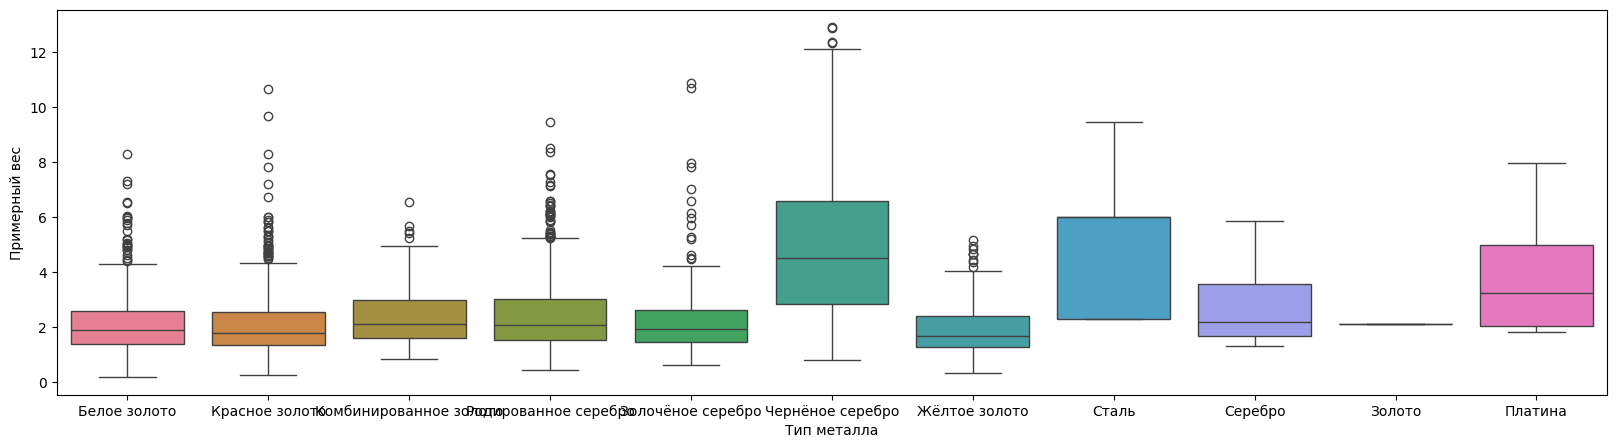

In [402]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.boxplot(df, x='Тип металла', y='Примерный вес', hue='Тип металла')
plt.show()

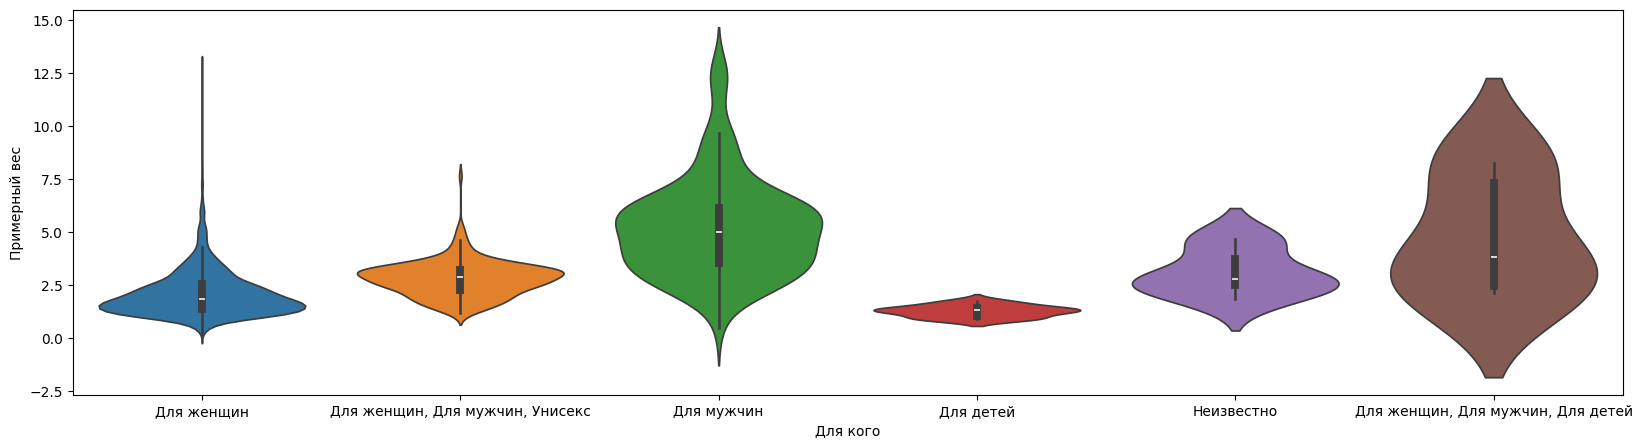

In [403]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.violinplot(df, x='Для кого', y='Примерный вес', hue='Для кого')
plt.show()

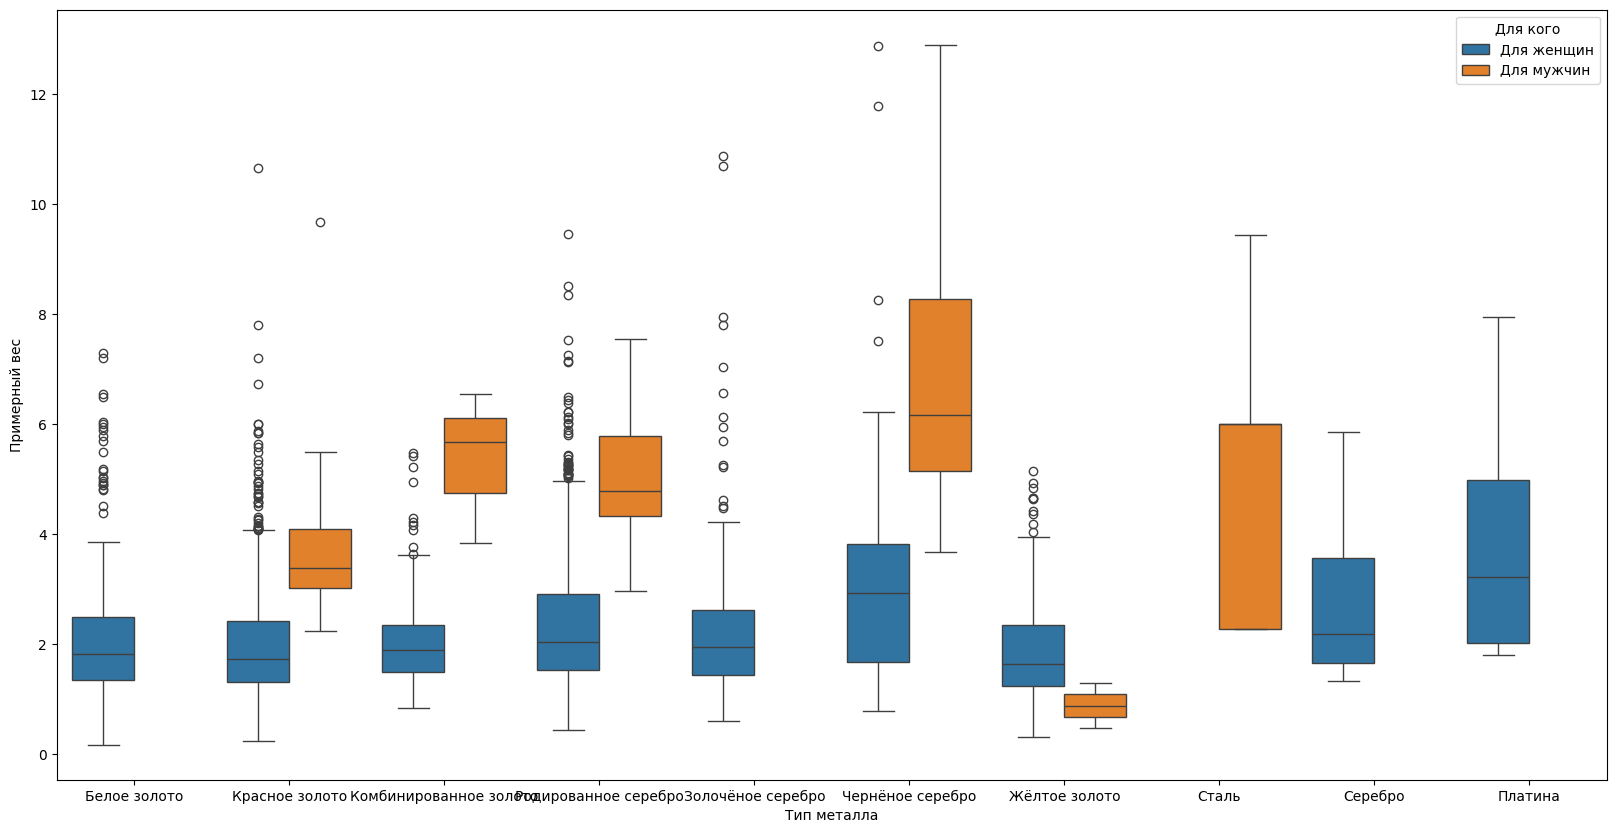

In [404]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(df.loc[(df['Для кого'] == 'Для мужчин') | (df['Для кого'] == 'Для женщин')], x='Тип металла', y='Примерный вес', hue='Для кого')
plt.show()

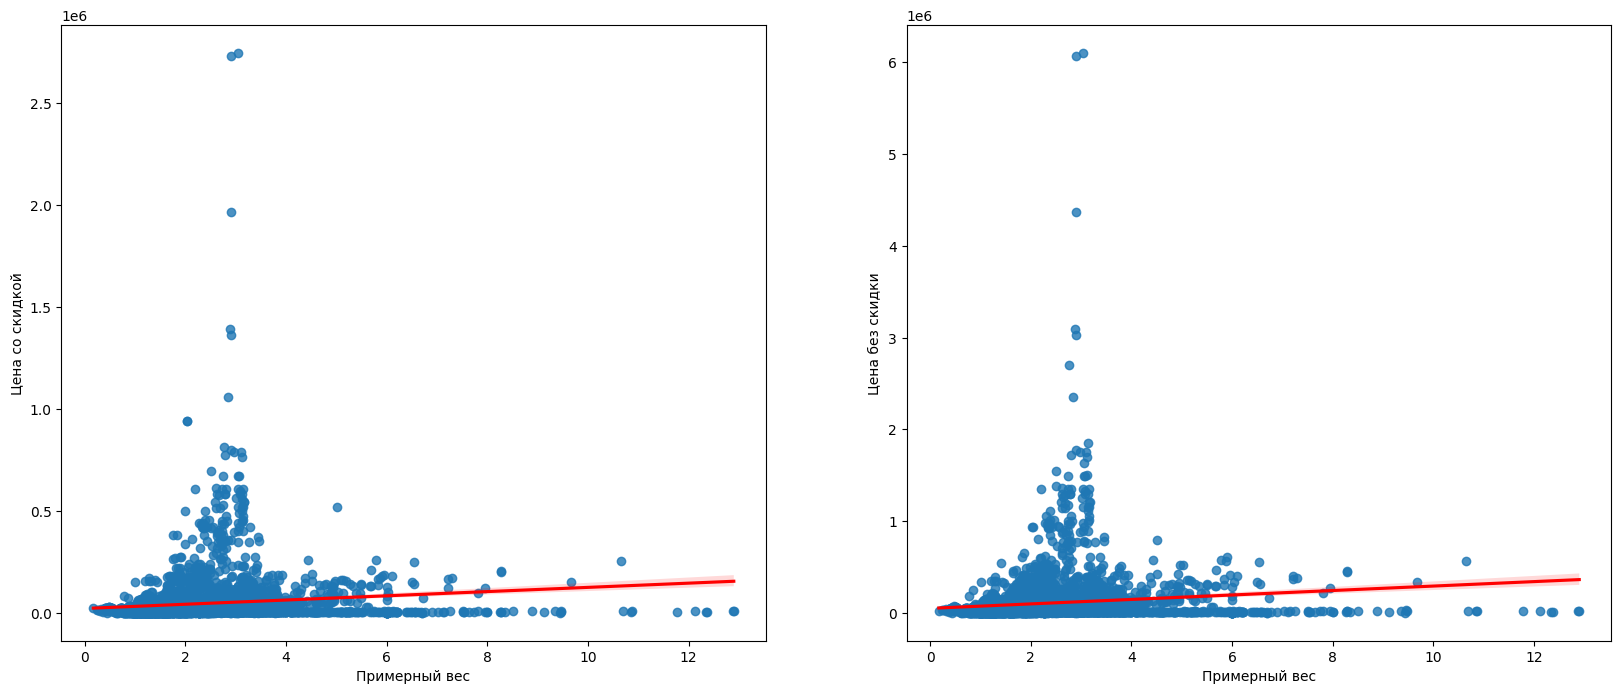

In [405]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.regplot(df, y='Цена со скидкой', x='Примерный вес', line_kws={'color' : 'red'}, ax=ax[0])
sns.regplot(df, y='Цена без скидки', x='Примерный вес', line_kws={'color' : 'red'}, ax=ax[1])
plt.show()

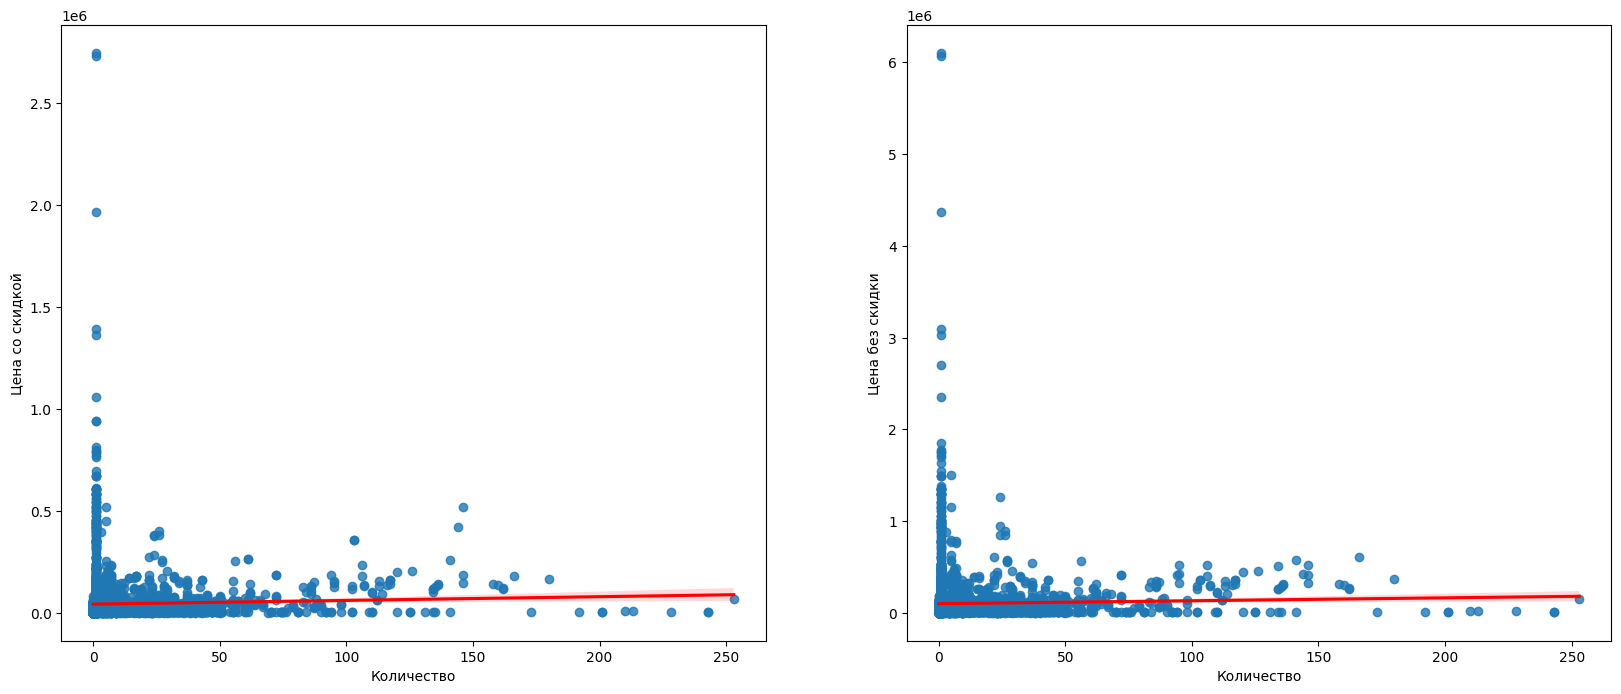

In [406]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.regplot(df, y='Цена со скидкой', x='Количество', line_kws={'color' : 'red'}, ax=ax[0])
sns.regplot(df, y='Цена без скидки', x='Количество', line_kws={'color' : 'red'}, ax=ax[1])
plt.show()

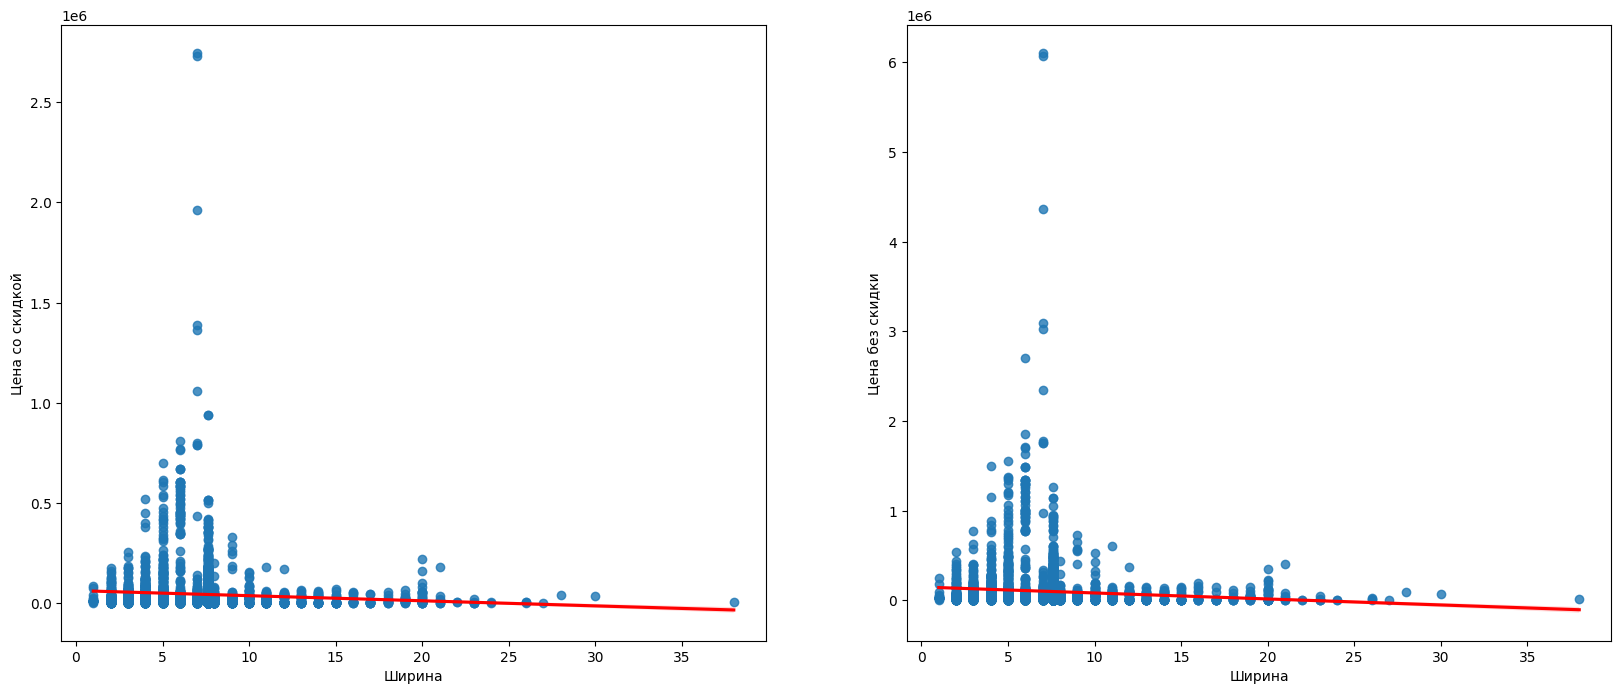

In [407]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.regplot(df, y='Цена со скидкой', x='Ширина', line_kws={'color' : 'red'}, ax=ax[0])
sns.regplot(df, y='Цена без скидки', x='Ширина', line_kws={'color' : 'red'}, ax=ax[1])
plt.show()

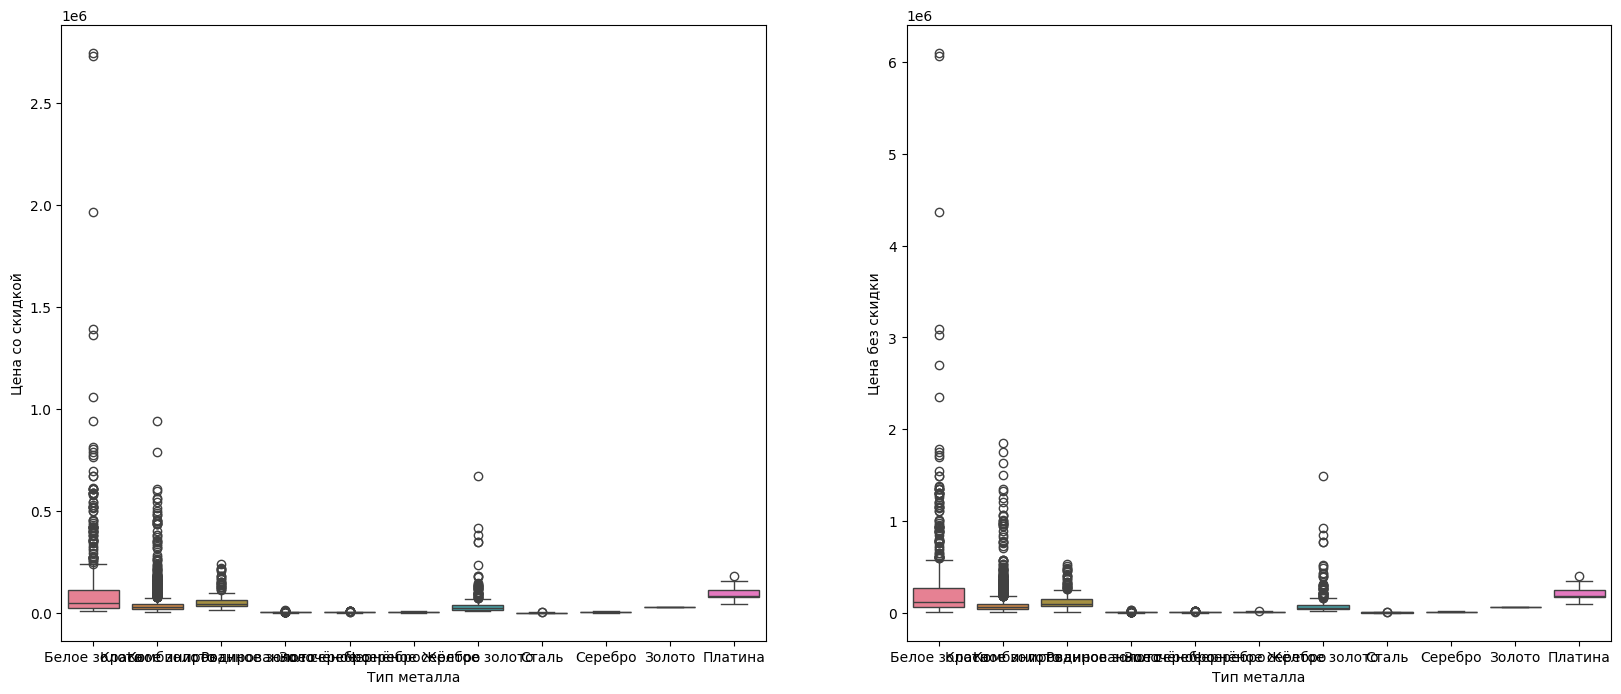

In [408]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.boxplot(df, y='Цена со скидкой', x='Тип металла', hue='Тип металла', ax=ax[0])
sns.boxplot(df, y='Цена без скидки', x='Тип металла', hue='Тип металла', ax=ax[1])
plt.show()

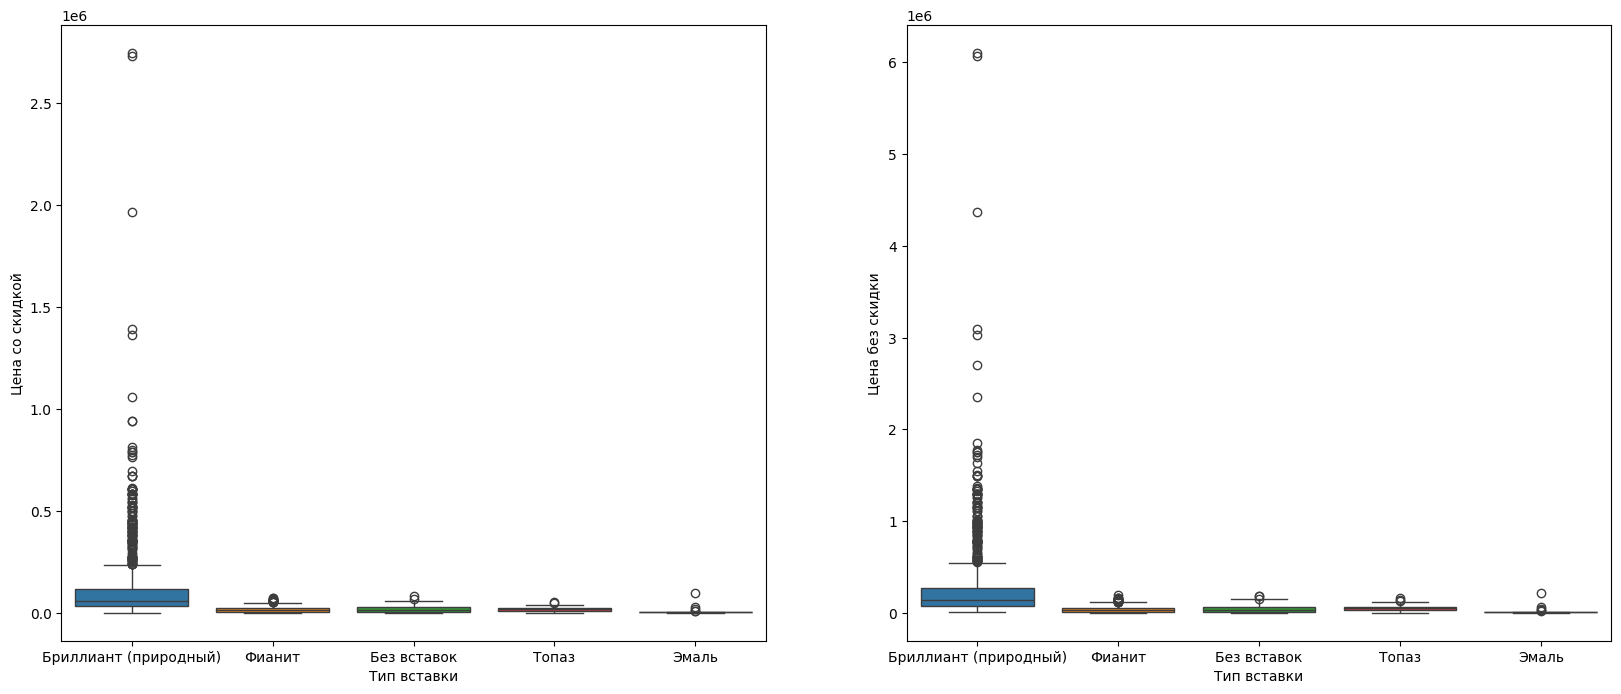

In [409]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.boxplot(df, y='Цена со скидкой', x='Тип вставки', hue='Тип вставки', ax=ax[0])
sns.boxplot(df, y='Цена без скидки', x='Тип вставки', hue='Тип вставки', ax=ax[1])
plt.show()

In [410]:
for c in df.columns:
    display(df[c].value_counts())
    print()

Артикул
1011493        1
110101         1
1012538        1
1012541        1
1012543        1
              ..
1012259-3      1
1012263        1
1012273-3      1
1012302-3      1
95010128-91    1
Name: count, Length: 4332, dtype: int64

Для кого
Для женщин                           3954
Для женщин, Для мужчин, Унисекс       221
Для мужчин                            127
Для детей                              17
Неизвестно                              7
Для женщин, Для мужчин, Для детей       6
Name: count, dtype: int64

Примерный вес
1.67     35
1.61     33
1.23     32
1.28     31
1.12     31
         ..
10.69     1
3.73      1
7.53      1
8.89      1
9.12      1
Name: count, Length: 553, dtype: int64

Тип металла
Красное золото            1610
Родированное серебро       973
Белое золото               736
Жёлтое золото              434
Комбинированное золото     272
Золочёное серебро          170
Чернёное серебро            86
Сталь                       25
Платина                     15
Серебро                     10
Золото                       1
Name: count, dtype: int64

Проба
585.0     2931
925.0     1239
375.0      119
1000.0      25
950.0       15
750.0        3
Name: count, dtype: int64

Покрытие
Родирование                             2341
Неизвестно                              1522
Алмазная грань,  Родирование             117
Золочение                                116
Эмаль                                     76
Золочение,  Родирование                   62
Алмазная грань                            53
Родирование,  Эмаль                       11
Гравировка                                 9
Золочение,  Эмаль                          7
Золочение,  Родирование,  Эмаль            7
Гравировка,  Родирование                   6
Чернение                                   2
Гравировка,  Золочение                     1
Лазерная обработка,  Родирование           1
Алмазная грань,  Родирование,  Эмаль       1
Name: count, dtype: int64

Тип вставки
Фианит                   1720
Бриллиант (природный)    1386
Без вставок               978
Топаз                     136
Эмаль                     112
Name: count, dtype: int64

Форма вставки
Круг           3024
Без вставок     978
Неизвестно      121
Сердце           30
Квадрат          29
Овал             29
Октагон          26
Груша            23
Багет            22
Маркиз           20
Антик            10
Принцесса         9
Триллион          6
Волна             3
Кушон             2
Name: count, dtype: int64

Количество
1.0      1791
0.0       978
5.0       122
7.0       114
3.0        86
         ... 
253.0       1
166.0       1
109.0       1
228.0       1
180.0       1
Name: count, Length: 117, dtype: int64

Цвет
Бесцветный     3038
Без вставок     978
Голубой         139
Неизвестно      112
Чёрный           25
Зелёный          15
Розовый           9
Жёлтый            9
Синий             6
Красный           1
Name: count, dtype: int64

Вес
0.000    978
0.451    134
0.480    109
0.846     91
0.201     86
        ... 
0.512      1
0.640      1
0.383      1
0.489      1
3.185      1
Name: count, Length: 637, dtype: int64

Ширина кольца
2.249783     1692
2.000000     1395
1.000000      523
3.000000      311
4.000000      159
5.000000       70
6.000000       60
7.000000       41
8.000000       31
11.000000      12
9.000000       10
10.000000      10
15.000000       5
12.000000       4
13.000000       4
17.000000       3
20.000000       1
14.000000       1
Name: count, dtype: int64

Ширина
7.605504     2110
4.000000      341
5.000000      312
3.000000      291
6.000000      281
7.000000      189
8.000000      133
2.000000      124
9.000000      104
10.000000      88
11.000000      88
12.000000      56
13.000000      33
20.000000      31
14.000000      25
19.000000      22
15.000000      21
1.000000       18
16.000000      15
17.000000      13
18.000000      13
21.000000       7
23.000000       6
26.000000       3
22.000000       2
24.000000       2
30.000000       1
38.000000       1
27.000000       1
28.000000       1
Name: count, dtype: int64

Высота
3.755826     2112
2.000000      592
3.000000      453
1.000000      389
4.000000      350
5.000000      273
6.000000      118
7.000000       22
8.000000        7
9.000000        6
11.000000       3
1.500000        2
13.000000       1
20.000000       1
12.000000       1
14.000000       1
10.000000       1
Name: count, dtype: int64

Номер страницы
38     58
128    58
5      57
125    54
11     53
       ..
138     4
80      4
139     2
140     1
94      1
Name: count, Length: 141, dtype: int64

Цена со скидкой
21600     132
17100     108
26100     108
23850     105
18000      91
         ... 
382500      1
358500      1
762750      1
39990       1
172500      1
Name: count, Length: 438, dtype: int64

Цена без скидки
47990      142
57990      116
52990      112
37990      112
62990      102
          ... 
1190         1
1694990      1
1194990      1
849990       1
774990       1
Name: count, Length: 311, dtype: int64

In [411]:
df.shape

(4332, 17)